# Day 2 - Tools and Libraries

In [1]:
%reload_ext autoreload
%autoreload 2

# Load environment variables
import dotenv
dotenv.load_dotenv('../.env', override=True)

False

# [Langchain](https://python.langchain.com/en/latest/index.html)

LangChain is a framework for developing applications powered by language models. 
The LangChain framework is designed around facilitating applications that are:
- Data-aware: connect a language model to other sources of data
- Agentic: allow a language model to interact with its environment


## Useful Docs
- [Agents](https://python.langchain.com/docs/modules/agents/)
- [Retrieval](https://python.langchain.com/docs/modules/data_connection/)
- [Memory](https://python.langchain.com/docs/modules/memory/)

## *Covered in Bootcamp 1.0*
If you are not familiar with these concepts at all, check them here:
- [Prompt Templates](https://github.com/georgian-io/genai-bootcamp/blob/main/archive/2023_june/notebooks/day-2/01-langchain.ipynb)
- [Chains](https://github.com/georgian-io/genai-bootcamp/blob/main/archive/2023_june/notebooks/day-2/01-langchain.ipynb)
- [Intro to Agents](https://github.com/georgian-io/genai-bootcamp/blob/main/archive/2023_june/notebooks/day-2/01-langchain.ipynb)


## Defining an LLM

On day 1 we showed you several examples of how to do the same task using different APIs.

Langchain makes switching between these backends easier

In [7]:
import os
from pprint import pprint
from langchain.llms import BaseLLM
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.chat_models import ChatAnyscale
from langchain.chat_models.vertexai import ChatVertexAI
from langchain.chat_models.bedrock import BedrockChat
    
llms = {}

# OpenAI
llms['OpenAI GPT 3.5'] = ChatOpenAI(
    model_name='gpt-3.5-turbo',
    temperature=0,
)

llms['OpenAI GPT 4'] = ChatOpenAI(
    model_name='gpt-4',
    temperature=0,
)

# LLaMa 2
llms['Llama 2 - 7B'] = ChatAnyscale(
    anyscale_api_key=os.getenv('ANYSCALE_ENDPOINT_TOKEN'),
    temperature=0, model_name="meta-llama/Llama-2-7b-chat-hf", 
    streaming=True
)

llms['Llama 2 - 70B'] = ChatAnyscale(
    anyscale_api_key=os.getenv('ANYSCALE_ENDPOINT_TOKEN'),
    temperature=0, model_name="meta-llama/Llama-2-70b-chat-hf", 
    streaming=True
)

# Google
llms['Google PaLM'] = ChatVertexAI()

# Claude (TBD)
llms['Anthropic Claude 2'] = BedrockChat(model_id='anthropic.claude-v2')


def test_llm(llm: BaseLLM):
    pprint(llm.predict_messages([HumanMessage(content="Who are you?")]).content)

for key, llm in llms.items():
    print(f"\n--- Testing {key} ---")
    test_llm(llm)



--- Testing OpenAI GPT 3.5 ---
('I am an AI language model developed by OpenAI. I am designed to assist with '
 'answering questions and engaging in conversations on a wide range of topics.')

--- Testing OpenAI GPT 4 ---
('I am an artificial intelligence developed by OpenAI, known as GPT-3. I am '
 'designed to assist with information and tasks, and to engage in conversation '
 'with users.')

--- Testing Llama 2 - 7B ---
(" Hello! I'm LLaMA, an AI assistant developed by Meta AI that can understand "
 'and respond to human input in a conversational manner. My primary function '
 "is to assist and provide helpful responses to users' inquiries, much like a "
 "chatbot or virtual assistant. I'm here to help you with any questions or "
 "topics you'd like to discuss, so feel free to ask me anything!")

--- Testing Llama 2 - 70B ---
(" Hello! My name is LLaMA, I'm a large language model trained by a team of "
 'researcher at Meta AI. My primary function is to understand and respond to '
 

### Examples of projects using Langchain
- [superagent](https://github.com/homanp/superagent/tree/main)
- [gpt-engineer](https://github.com/AntonOsika/gpt-engineer)

# [Pandas AI](https://docs.pandas-ai.com/en/latest/)

In [2]:
from pandasai import SmartDataframe
import pandas as pd

In [3]:
df = pd.read_csv('../extra_resources/candy-data.csv')
sdf = SmartDataframe(df, config={"llm": llms['OpenAI GPT 3.5']})


In [4]:
sdf.chat('Which is the healthiest candy and why?')

'The healthiest candy is One dime with a sugar percent of 0.011.'

In [5]:
sdf.chat('Which is the healthiest candy that has chocolate and peanuts?')

'The healthiest candy that has chocolate and peanuts is ReeseÕs Miniatures.'

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: 'exports/charts/temp_chart.png'\n"

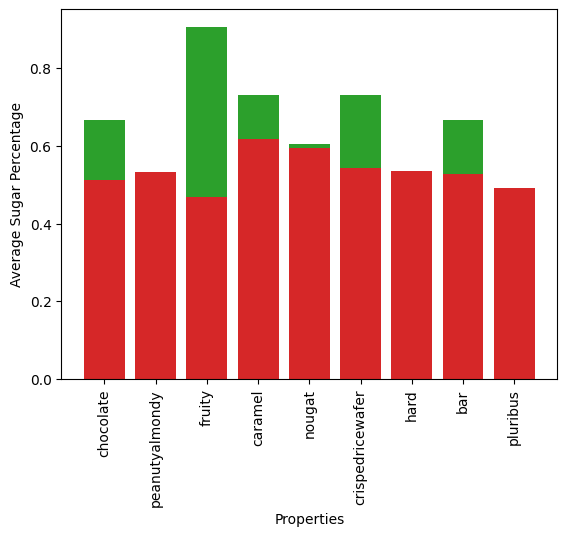

In [12]:
sdf.chat('Properties are things like chocolate, peanuts, etc. Plot properties vs avg sugar percentage of candies with that property. Make the x-axis label be vertical.')

In [6]:
sdf.chat('What is the minimum combination of candies that together include all categories?')

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'RangeIndex' object has no attribute 'combinations'\n"

# And, honestly, too much more...

### Advise
- Someone probably has already thought your idea
  - Probably, what they built was not good or is now abandoned
  - Do some research first, get ideas, learn from your mistakes
- Brainstorm a bit first
  - Think through the problem you are facing and think to yourself, if I were to try to build a startup around this idea, what would that look like?
  - Then google exactly that, it might exists already (goo! you can use it now and save yourself some time)
- $$

Resources:
- Collections
  - [AI Collection](https://github.com/ai-collection/ai-collection)
  - [Awesome Generative AI](https://github.com/filipecalegario/awesome-generative-ai)
- Search
  - [Github](https://github.com/topics/generative-ai)
  - [Google](https://letmegooglethat.com/?q=Generative+AI+for+excel+%2B+github)